In [ ]:
# Tutorial followed
https://github.com/tensorflow/models


## Objection Detecion

In [2]:
# Change the library to the right google drive folder
% cd /content/drive/MyDrive/Data_Science/projects/Chess_obj_det

/content/drive/MyDrive/Data_Science/projects/Chess_obj_det


In [3]:
!pwd

/content/drive/MyDrive/Data_Science/projects/Chess_obj_det


In [4]:
# install tensorflow 
# !pip install -U --pre tensorflow=="2.*"
!pip install -U --pre tensorflow=="2.6.0"
!pip install tf_slim

     |████████████████████████████████| 352 kB 5.4 MB/s 


In [5]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [6]:
# install pycocotools
!pip install pycocotools

In [7]:
# % cd /content/drive/MyDrive/Data_Science/projects/Chess_obj_det
!pwd

/content/drive/My Drive/Data_Science/projects/Chess_obj_det


In [8]:
# Copy model from https://github.com/tensorflow/models
import os
import pathlib


if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

In [9]:
## Converting .proto files to python
%%bash
cd models/research
protoc object_detection/protos/*.proto --python_out=.


In [10]:
!pwd

/content/drive/My Drive/Data_Science/projects/Chess_obj_det


In [11]:
# install setup.py
%cd /content/drive/My Drive/Data_Science/projects/Chess_obj_det/models/research
!cp object_detection/packages/tf2/setup.py .
!pip install .
# !python -m pip install .

/content/drive/My Drive/Data_Science/projects/Chess_obj_det/models/research
Processing /content/drive/My Drive/Data_Science/projects/Chess_obj_det/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.8 MB 8.5 MB/s 
     |████████████████████████████████| 1.8 MB 38.2 MB/s 
     |████████████████████████████████| 37.1 MB 1.4 MB/s 
     |████████████████████████████████| 99 kB 8.7 MB/s 
     |████████████████████████████████| 90 kB 9.3 MB/s 
     |████████████████████████████████| 1.1 MB 49.8 MB/s 
     |████████████████████████████████| 43 kB 1.2 MB/s 
     |████████████████████████████████| 21

In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

In [2]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util


In [3]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

# User Pre-Trained Tensorflow Model

In [ ]:
%cd /content/drive/MyDrive/Data_Science/projects/Chess_obj_det/models/research/object_detection

# !wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz 
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

In [ ]:
# untar the model
!tar -xvf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz


## Generate tfrecord file from CSV format

In [ ]:
# from train.csv to train.record
!python generate_tfrecord.py --csv_input=chess_dataset/train/train.csv --image_dir=chess_dataset/train --output_path=train.record

In [ ]:
#test.csv to test.record
!python generate_tfrecord.py --csv_input=chess_dataset/valid/test.csv --image_dir=chess_dataset/valid --output_path=test.record

## Training

In [ ]:
% cd //content/drive/MyDrive/Data_Science/projects/Chess_obj_det/models/research/object_detection
!python model_main_tf2.py --model_dir=training --pipeline_config_path=training/pipeline.config


In [ ]:
## Resume Training
# !python model_main_tf2.py --model_dir=resume_train --pipeline_config_path=resume_train/pipeline.config


## Exporting checkpoint files to saved model


In [ ]:
### Exporting the model
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path training/pipeline.config --trained_checkpoint_dir training/ --output_directory exported-models/my_model


## Custome Model Inferencing

In [22]:
import pathlib

def load_custom_model(model_name):
    model_file = model_name
    model_dir = pathlib.Path(model_file) #/"saved_model"
    print(f'the model dir is {model_dir}')
    model = tf.saved_model.load(str(model_dir))

    return model

In [14]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/drive/MyDrive/Data_Science/projects/Chess_obj_det/models/research/object_detection/training/labelmap.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


In [15]:
!pwd

/content/drive/MyDrive/Data_Science/projects/Chess_obj_det/models/research/object_detection


In [33]:
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
%cd /content/drive/MyDrive/Data_Science/projects/Chess_obj_det
PATH_TO_TEST_IMAGES_DIR = pathlib.Path('models/research/object_detection/test_images/chess')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpg")))
TEST_IMAGE_PATHS

/content/drive/MyDrive/Data_Science/projects/Chess_obj_det


[PosixPath('models/research/object_detection/test_images/chess/01.jpg'),
 PosixPath('models/research/object_detection/test_images/chess/02.jpg'),
 PosixPath('models/research/object_detection/test_images/chess/03.jpg'),
 PosixPath('models/research/object_detection/test_images/chess/04.jpg'),
 PosixPath('models/research/object_detection/test_images/chess/05.jpg')]

In [25]:
%cd /content/drive/MyDrive/Data_Science/projects/Chess_obj_det/models/research/object_detection
model_name = 'exported_model/my_model'
detection_model = load_custom_model('/content/drive/MyDrive/Data_Science/projects/Chess_obj_det/models/research/object_detection/exported-models/my_model/saved_model')

/content/drive/MyDrive/Data_Science/projects/Chess_obj_det/models/research/object_detection
the model dir is /content/drive/MyDrive/Data_Science/projects/Chess_obj_det/models/research/object_detection/exported-models/my_model/saved_model


In [ ]:
print(detection_model.signatures['serving_default'].inputs)

In [27]:
detection_model.signatures['serving_default'].output_dtypes

{'detection_anchor_indices': tf.float32,
 'detection_boxes': tf.float32,
 'detection_classes': tf.float32,
 'detection_multiclass_scores': tf.float32,
 'detection_scores': tf.float32,
 'num_detections': tf.float32,
 'raw_detection_boxes': tf.float32,
 'raw_detection_scores': tf.float32}

In [28]:
detection_model.signatures['serving_default'].output_shapes

{'detection_anchor_indices': TensorShape([1, 300]),
 'detection_boxes': TensorShape([1, 300, 4]),
 'detection_classes': TensorShape([1, 300]),
 'detection_multiclass_scores': TensorShape([1, 300, 7]),
 'detection_scores': TensorShape([1, 300]),
 'num_detections': TensorShape([1]),
 'raw_detection_boxes': TensorShape([1, 300, 4]),
 'raw_detection_scores': TensorShape([1, 300, 7])}

In [29]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

In [30]:
def show_inference(model, image_path):
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = np.array(Image.open(image_path))
  # Actual detection.
  output_dict = run_inference_for_single_image(model, image_np)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)

  display(Image.fromarray(image_np))

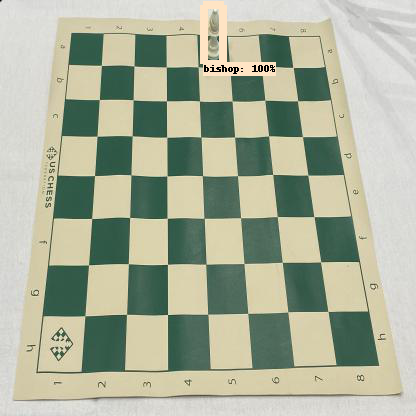

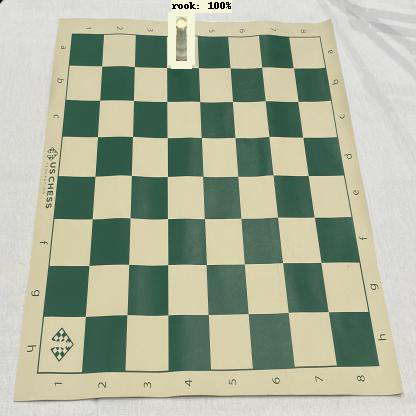

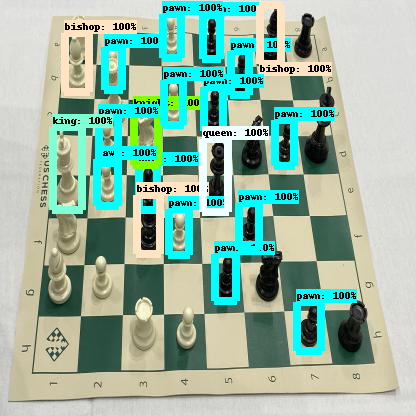

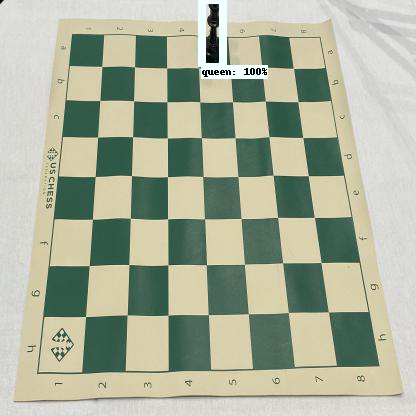

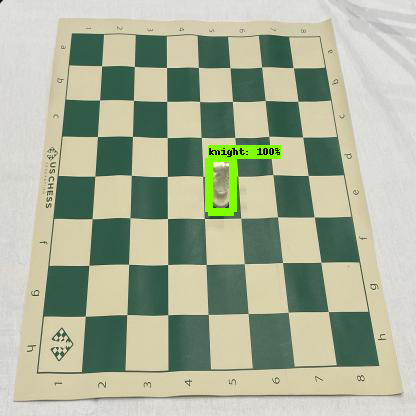

In [34]:
for image_path in TEST_IMAGE_PATHS:
  show_inference(detection_model, image_path)
